# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city and country code based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information.
weatherUrl = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
weatherQueryUrl = f"{weatherUrl}appid={api_key}&units={units}&q="

## Generate Cities List
NOTE:  citipy only looks for cities with at least 500 people.  This may impact our ability to find cities near the two poles if population density is not high enough.

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
locations = pd.DataFrame()

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=5)
lngs = np.random.uniform(low=-180.000, high=180.000, size=5)

# Add Northernmost city > 500 Reykjavík, Iceland
# Add Southernmost city > 500 Ushuaia, Argentina 
lats = np.append(lats, [64.128288, -54.7999992])
lngs = np.append(lngs, [-21.827774, -68.3000031])

lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
i = 0
for lat_lng in lat_lngs:
    result = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = result.city_name
    countryCode = result.country_code
   
    # If the city is unique, then add it to a our cities list
    locations.loc[i,"City"] = city
    locations.loc[i, "Country Code"] = countryCode
    i+=1

# Print the city count to confirm sufficient count
locations = locations.drop_duplicates(keep="first")
len(locations)

7

## Latitude vs Longitude
Check for even distribution

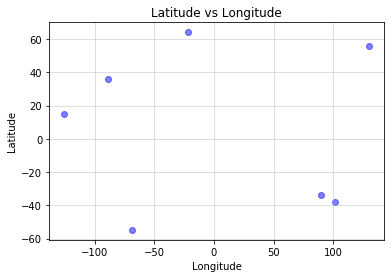

In [4]:
# Plot Latitude vs Cloudiness
plt.scatter(lngs, lats, c="b", alpha=0.5)
plt.title(f'Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.5)
plt.show()

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
weather = pd.DataFrame()
weather

""


In [6]:
#index = 0
for index, location in locations.iterrows():
    time.sleep(2)
    response = requests.get(weatherQueryUrl + locations.loc[index]["City"] + "," + locations.loc[index]["Country Code"]).json()
    
    try:
       
        if (len(response)>0):
            weather.loc[index, "City"] = response["name"]
            weather.loc[index, "Cloudiness"] = response["clouds"]["all"]
            weather.loc[index, "Country"] = response["sys"]["country"]
            weather.loc[index, "Humidity"] = response["main"]["humidity"]
            weather.loc[index, "Lat"] = response["coord"]["lat"]
            weather.loc[index, "Lon"] = response["coord"]["lon"]
            weather.loc[index, "Temp"] = response["main"]["temp"]
            weather.loc[index, "Wind Speed"] = response["wind"]["speed"]
                
    except(KeyError, IndexError):
        print(f"Missing field/result for {locations.loc[index]['City']}, {locations.loc[index]['Country Code']}... skipping.")


Missing field/result for chagda, ru... skipping.


In [7]:
weather = weather.dropna(axis=0, how='any', thresh=1, inplace=False)
weather

,City,Cloudiness,Country,Humidity,Lat,Lon,Temp,Wind Speed
1,Geraldton,0.0,AU,87.0,-28.77,114.60,9.00,3.10
2,Martin,1.0,US,29.0,43.17,-101.73,16.00,7.70
3,Constitucion,40.0,MX,25.0,23.99,-104.67,25.00,4.10
4,Busselton,0.0,AU,72.0,-33.64,115.35,7.40,4.91
5,Kopavogur,75.0,IS,87.0,64.11,-21.91,8.76,4.60
6,Ushuaia,100.0,AR,94.0,-54.81,-68.31,0.93,3.78


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Grab the date
tupleTime = time.localtime() # get struct_time
timeString = time.strftime("%m/%d/%Y", tupleTime)
timeString

'10/06/2019'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

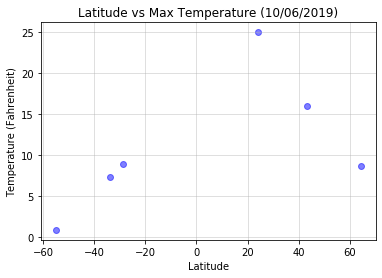

In [9]:
# Plot Latitude vs Max Temperature
plt.scatter(weather["Lat"], weather["Temp"], c="b", alpha=0.5)
plt.title(f'Latitude vs Max Temperature ({timeString})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid(alpha=0.5)
plt.show()

#### Latitude vs. Humidity Plot

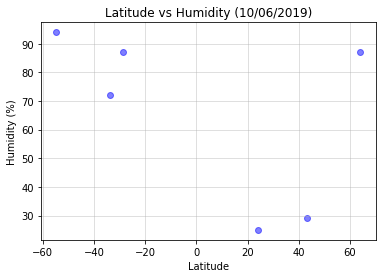

In [10]:
# Plot Latitude vs Humidity
plt.scatter(weather["Lat"], weather["Humidity"], c="b", alpha=0.5)
plt.title(f'Latitude vs Humidity ({timeString})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(alpha=0.5)
plt.show()

#### Latitude vs. Cloudiness Plot

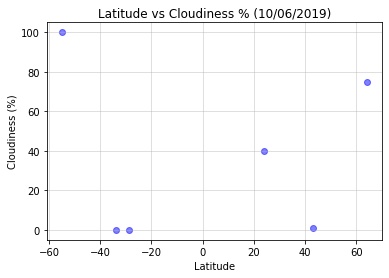

In [11]:
# Plot Latitude vs Cloudiness
plt.scatter(weather["Lat"], weather["Cloudiness"], c="b", alpha=0.5)
plt.title(f'Latitude vs Cloudiness % ({timeString})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(alpha=0.5)
plt.show()

#### Latitude vs. Wind Speed Plot

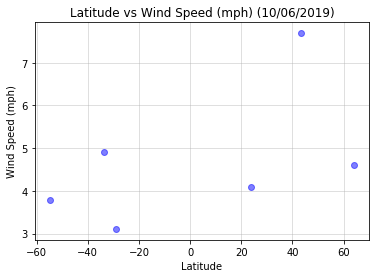

In [12]:
# Plot Latitude vs Cloudiness
plt.scatter(weather["Lat"], weather["Wind Speed"], c="b", alpha=0.5)
plt.title(f'Latitude vs Wind Speed (mph) ({timeString})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(alpha=0.5)
plt.show()

## Longitude vs Latitude
Checking for relatively even distribution of resulting cities.

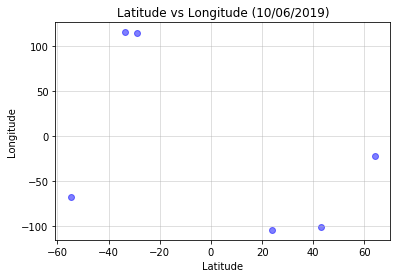

In [13]:
# Plot Latitude vs Cloudiness
plt.scatter(weather["Lat"], weather["Lon"], c="b", alpha=0.5)
plt.title(f'Latitude vs Longitude ({timeString})')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(alpha=0.5)
plt.show()